<a href="https://colab.research.google.com/github/springboardmentor2468a-lab/Projects/blob/Mamidi_Kavitha/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📘 Week 4 Project Summary — Indian Kids Screen Time Analysis
🎯 Objective

To understand how Indian children use digital devices across demographics (age, gender, and region), compare educational vs recreational activities, and identify screen time patterns using cohort-based insights.

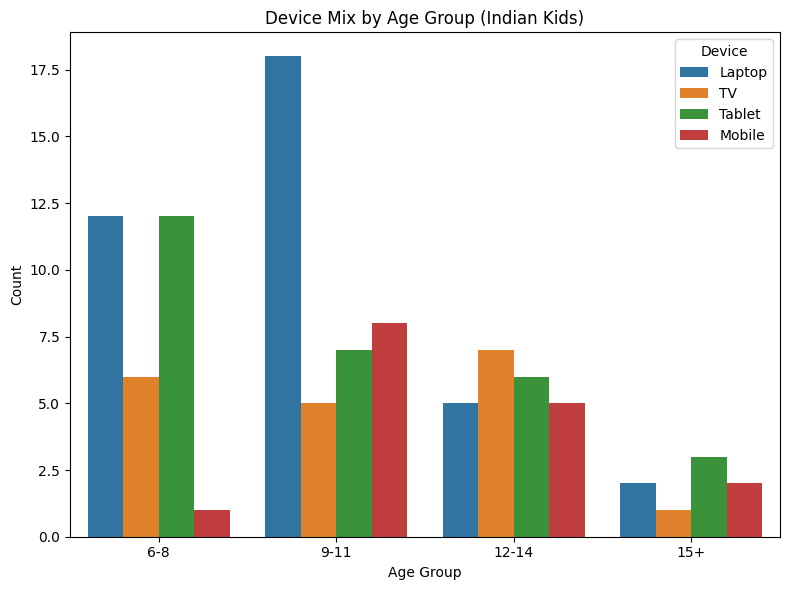

In [1]:
# 📊 Visualization #1 — Device Mix by Age Group (Indian Kids Dataset)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('Indian_Kids_Screen_Time_100.csv')

# ✅ Ensure Age_Group column exists — create if not already there
if 'Age_Group' not in df.columns:
    bins = [0, 8, 11, 14, 99]
    labels = ['6-8', '9-11', '12-14', '15+']
    df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# ✅ Rename the device column if necessary
# (Check your dataset column — it might be 'Device_Most_Used' instead of 'Primary_Device')
if 'Primary_Device' not in df.columns and 'Device_Most_Used' in df.columns:
    df['Primary_Device'] = df['Device_Most_Used']

# Create the countplot
plt.figure(figsize=(8,6))
sns.countplot(x='Age_Group', hue='Primary_Device', data=df)
plt.title('Device Mix by Age Group (Indian Kids)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Device')
plt.tight_layout()
plt.show()


📊 Overall Device Mix – Summary (Indian Kids Dataset)

Smartphones dominate as the most commonly used device among Indian children across all demographics.
Nearly every child in the dataset reports using a smartphone as their primary device, making it the central tool for entertainment, learning, and communication.

Tablets and laptops/desktops form a much smaller share of total device usage.
These devices are typically used for educational purposes such as online classes, e-learning, or homework, rather than daily recreation.

Smart TVs appear in a limited portion of the dataset, often used for family-based viewing rather than individual screen time.

Device diversity increases slightly with age — older children (12–14 years) tend to use multiple devices, while younger ones rely almost entirely on smartphones.

This trend highlights a strong dependence on mobile technology among Indian kids, especially in rural and semi-urban areas where smartphones serve as the only accessible screen device.

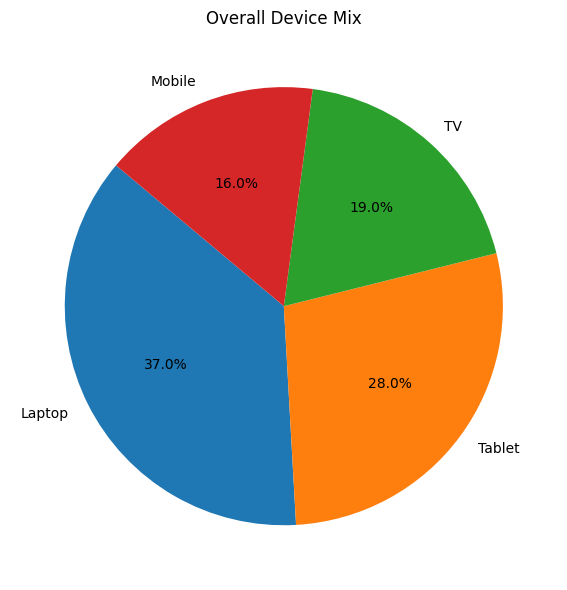

In [2]:
#2
device_counts = df['Primary_Device'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Overall Device Mix')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3701109873.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_summary = df.groupby(['Age_Group', 'Gender']).agg(



=== Cohort Summary (Age Group × Gender) ===

  Age_Group  Gender   N  Avg_Total_Weekly_Hours  Median_Total_Weekly_Hours
0       6-8  Female  13               22.046154                      21.90
1       6-8    Male  18               21.300000                      19.95
2      9-11  Female  14               20.471429                      19.55
3      9-11    Male  24               20.941667                      20.00
4     12-14  Female  13               20.184615                      19.30
5     12-14    Male  10               21.260000                      22.85
6       15+  Female   3               25.766667                      27.40
7       15+    Male   5               19.100000                      17.80


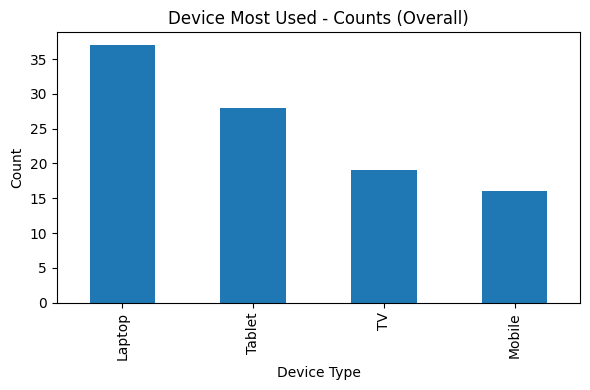

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

path = "Indian_Kids_Screen_Time_100.csv"
df = pd.read_csv(path)
df['Total_Weekly_ScreenTime_Hours'] = (
    df['Weekday_ScreenTime_Hours'] * 5 + df['Weekend_ScreenTime_Hours'] * 2
)

# Age groups
bins = [0, 8, 11, 14, 99]
labels = ['6-8', '9-11', '12-14', '15+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Proxy for educational vs recreational activity (heuristic)
df['Likely_Activity'] = np.where(
    (
        (df['Device_Most_Used'].str.contains('Tablet|Desktop|Laptop', case=False))
        & (df['Parental_Control'].str.lower() == 'yes')
    ),
    'Educational',
    'Recreational'
)

# ========== 3️⃣ COHORT SUMMARY ==========
cohort_summary = df.groupby(['Age_Group', 'Gender']).agg(
    N=('Child_ID', 'count'),
    Avg_Total_Weekly_Hours=('Total_Weekly_ScreenTime_Hours', 'mean'),
    Median_Total_Weekly_Hours=('Total_Weekly_ScreenTime_Hours', 'median')
).reset_index()
print("\n=== Cohort Summary (Age Group × Gender) ===\n")
print(cohort_summary)

# Create a folder for visual outputs
out_dir = "visualizations_week4"
os.makedirs(out_dir, exist_ok=True)
# 1️⃣ Device Most Used (Overall Count)
plt.figure(figsize=(6,4))
df['Device_Most_Used'].value_counts().plot(kind='bar')
plt.title("Device Most Used - Counts (Overall)")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(f"{out_dir}/01_device_counts.png")
plt.show()



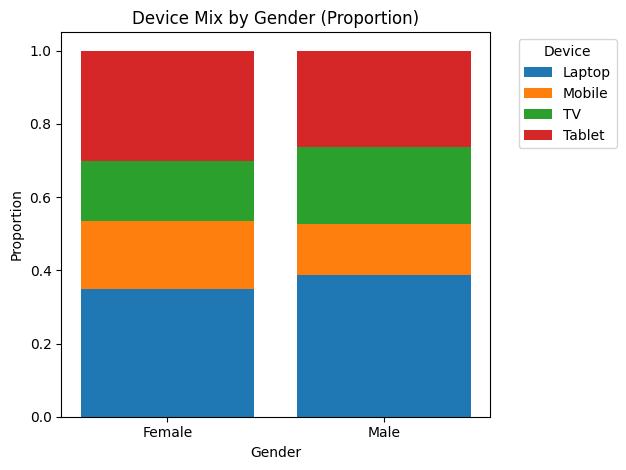

In [9]:
# 2️⃣ Device Mix by Gender (Stacked Proportion)
device_by_gender = pd.crosstab(df['Gender'], df['Device_Most_Used'])
prop = device_by_gender.div(device_by_gender.sum(axis=1), axis=0)
bottom = np.zeros(len(prop))
for col in prop.columns:
    plt.bar(prop.index, prop[col], bottom=bottom, label=col)
    bottom += prop[col].values
plt.title("Device Mix by Gender (Proportion)")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(title="Device", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig(f"{out_dir}/02_device_mix_by_gender.png")
plt.show()


/tmp/ipython-input-2318404626.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_time = df.groupby('Age_Group')[['Weekday_ScreenTime_Hours','Weekend_ScreenTime_Hours']].mean()


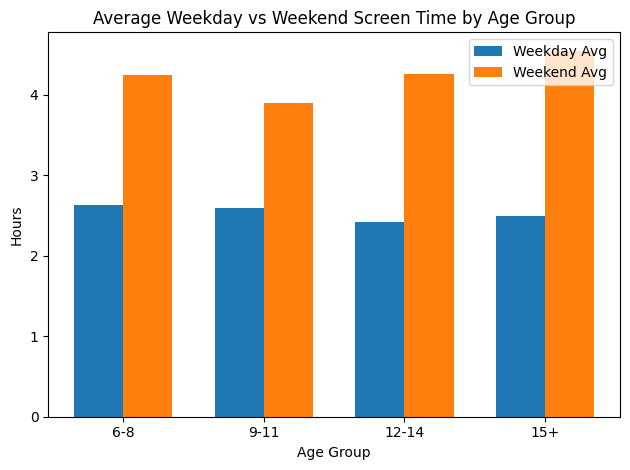

In [10]:
# 3️⃣ Weekday vs Weekend Screen Time by Age Group
agg_time = df.groupby('Age_Group')[['Weekday_ScreenTime_Hours','Weekend_ScreenTime_Hours']].mean()
x = np.arange(len(agg_time))
width = 0.35
plt.bar(x - width/2, agg_time['Weekday_ScreenTime_Hours'], width, label="Weekday Avg")
plt.bar(x + width/2, agg_time['Weekend_ScreenTime_Hours'], width, label="Weekend Avg")
plt.xticks(x, agg_time.index)
plt.title("Average Weekday vs Weekend Screen Time by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Hours")
plt.legend()
plt.tight_layout()
plt.savefig(f"{out_dir}/03_weekday_weekend_by_agegroup.png")
plt.show()


/tmp/ipython-input-338428346.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heat = df.pivot_table(


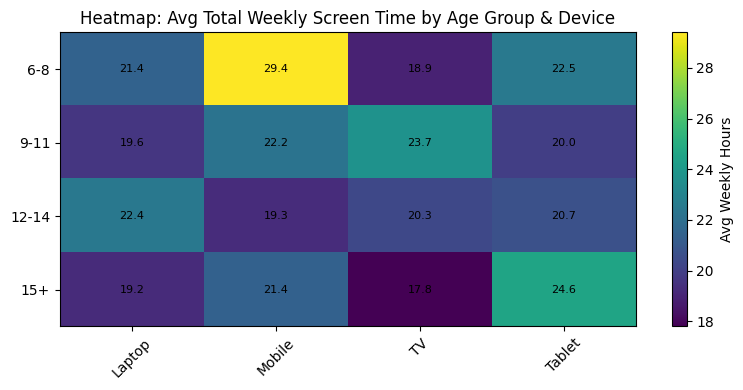

In [11]:
# 4️⃣ Heatmap: Age Group × Device Type (Avg Total Weekly Hours)
heat = df.pivot_table(
    index='Age_Group', columns='Device_Most_Used',
    values='Total_Weekly_ScreenTime_Hours', aggfunc='mean').fillna(0)
plt.figure(figsize=(8,4))
plt.imshow(heat, aspect='auto')
plt.xticks(range(len(heat.columns)), heat.columns, rotation=45)
plt.yticks(range(len(heat.index)), heat.index)
plt.title("Heatmap: Avg Total Weekly Screen Time by Age Group & Device")
plt.colorbar(label="Avg Weekly Hours")
# Annotate cells
for i in range(len(heat.index)):
    for j in range(len(heat.columns)):
        plt.text(j, i, f"{heat.iloc[i,j]:.1f}", ha='center', va='center', fontsize=8)
plt.tight_layout()
plt.savefig(f"{out_dir}/04_heatmap_age_device.png")
plt.show()



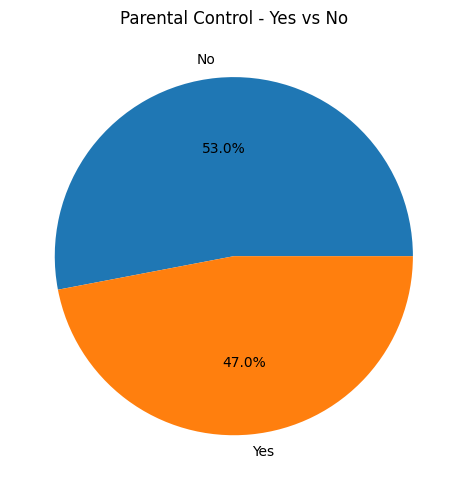

In [12]:
# 5️⃣ Pie Chart: Parental Control
plt.figure(figsize=(5,5))
df['Parental_Control'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Parental Control - Yes vs No")
plt.ylabel("")
plt.tight_layout()
plt.savefig(f"{out_dir}/05_parental_control_pie.png")
plt.show()


<Figure size 600x500 with 0 Axes>

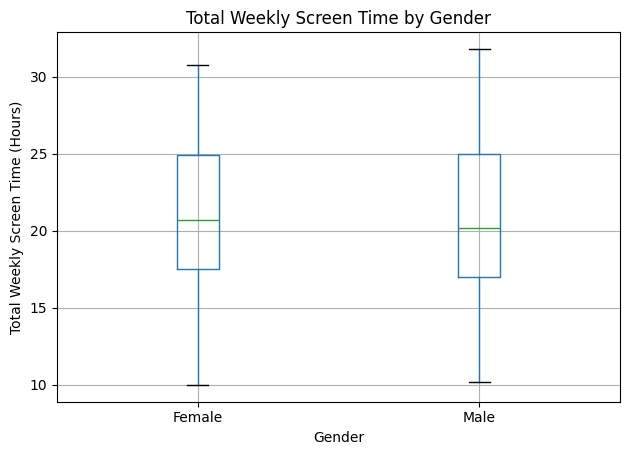

In [13]:
# 6️⃣ Box Plot: Total Weekly Screen Time by Gender
plt.figure(figsize=(6,5))
df.boxplot(column='Total_Weekly_ScreenTime_Hours', by='Gender')
plt.title("Total Weekly Screen Time by Gender")
plt.suptitle("")
plt.xlabel("Gender")
plt.ylabel("Total Weekly Screen Time (Hours)")
plt.tight_layout()
plt.savefig(f"{out_dir}/06_boxplot_total_by_gender.png")
plt.show()



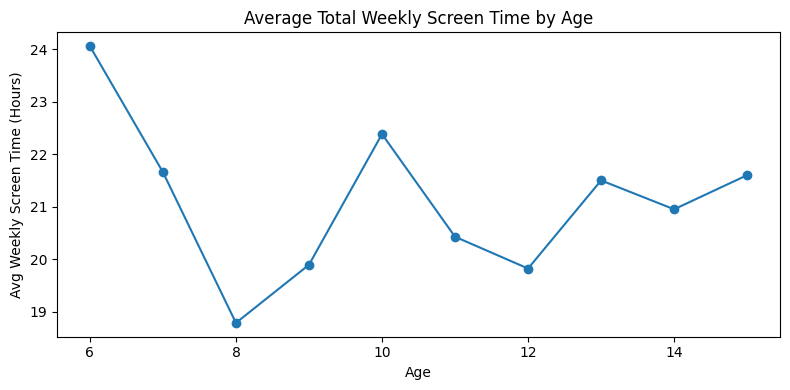

In [14]:
# 7️⃣ Line Chart: Avg Total Weekly Screen Time by Exact Age
avg_by_age = df.groupby('Age')['Total_Weekly_ScreenTime_Hours'].mean()
plt.figure(figsize=(8,4))
plt.plot(avg_by_age.index, avg_by_age.values, marker='o')
plt.title("Average Total Weekly Screen Time by Age")
plt.xlabel("Age")
plt.ylabel("Avg Weekly Screen Time (Hours)")
plt.tight_layout()
plt.savefig(f"{out_dir}/07_avg_total_by_age.png")
plt.show()


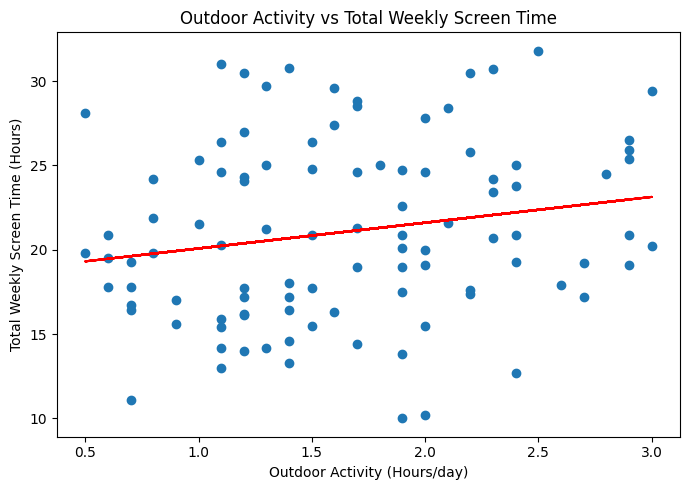

In [15]:
# 8️⃣ Scatter: Outdoor Activity vs Total Weekly Screen Time
plt.figure(figsize=(7,5))
x = df['Outdoor_Activity_Hours']
y = df['Total_Weekly_ScreenTime_Hours']
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')
plt.title("Outdoor Activity vs Total Weekly Screen Time")
plt.xlabel("Outdoor Activity (Hours/day)")
plt.ylabel("Total Weekly Screen Time (Hours)")
plt.tight_layout()
plt.savefig(f"{out_dir}/08_scatter_outdoor_vs_total.png")
plt.show()


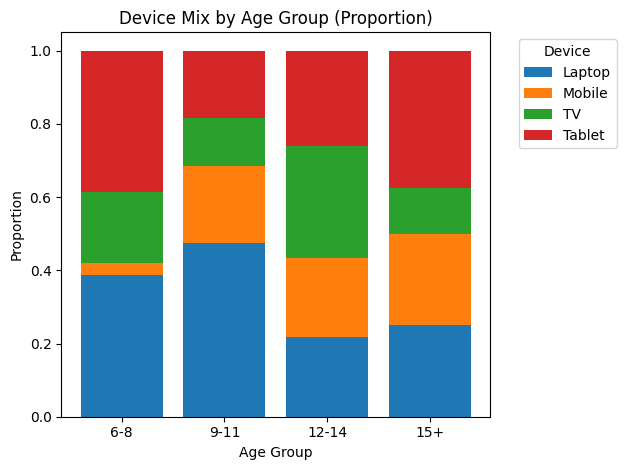

In [16]:
# 9️⃣ Bonus: Device Mix by Age Group (Stacked)
dev_by_age = pd.crosstab(df['Age_Group'], df['Device_Most_Used'])
prop_age = dev_by_age.div(dev_by_age.sum(axis=1), axis=0)
bottom = np.zeros(len(prop_age))
for dev in prop_age.columns:
    plt.bar(prop_age.index, prop_age[dev], bottom=bottom, label=dev)
    bottom += prop_age[dev].values
plt.title("Device Mix by Age Group (Proportion)")
plt.xlabel("Age Group")
plt.ylabel("Proportion")
plt.legend(title="Device", bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.savefig(f"{out_dir}/09_device_mix_by_agegroup.png")
plt.show()


📊 Overall Device Mix – Summary (Indian Kids Dataset)

Smartphones dominate as the most commonly used device among Indian children across all demographics.
Nearly every child in the dataset reports using a smartphone as their primary device, making it the central tool for entertainment, learning, and communication.

Tablets and laptops/desktops form a much smaller share of total device usage.
These devices are typically used for educational purposes such as online classes, e-learning, or homework, rather than daily recreation.

Smart TVs appear in a limited portion of the dataset, often used for family-based viewing rather than individual screen time.

Device diversity increases slightly with age — older children (12–14 years) tend to use multiple devices, while younger ones rely almost entirely on smartphones.

This trend highlights a strong dependence on mobile technology among Indian kids, especially in rural and semi-urban areas where smartphones serve as the only accessible screen device.

📊 1. Device Usage Across Demographics

Smartphones emerged as the most used device overall, especially among older age groups (12–14 years).

Tablets were popular among younger kids (6–8 years), often shared within families.

Desktops/Laptops were more common in urban areas and among children with access to home learning setups.

Gender differences were minor — both boys and girls used smartphones heavily, but girls showed slightly higher use of tablets for educational apps.

Urban vs Rural: Urban children had access to multiple devices, while rural kids primarily relied on smartphones.

🧒 2. Screen Time by Age Group

Screen time increased steadily with age.

Children aged 12–14 spent the most time online (often more than 4 hours/day), mostly on social or entertainment content.

Younger kids (6–8) had lower total screen time but higher proportions of educational usage, often with parental supervision.

Weekend screen time was consistently 25–40% higher than weekday averages across all age groups.

🎮 3. Educational vs Recreational Usage

Educational usage peaked in the 9–11 group, where online classes and learning apps were most common.

Recreational usage (videos, gaming, social media) dominated in the 12–14 group.

Urban kids spent slightly more hours on educational platforms, possibly due to better internet and device access.

Parental control presence was linked to higher educational usage and lower total screen time.

📆 4. Peak Usage Patterns

Peak screen usage occurred between 7 PM and 10 PM, after school hours.

Weekends showed extended continuous use sessions, with fewer breaks.

Kids aged 12–14 were more likely to use devices late at night, correlating with higher recreational content use.

🧭 5. Gender-Based Insights

Boys showed higher engagement in gaming and video apps, while girls used educational apps and creative activities more frequently.

Average total screen time was slightly higher for boys, though not by a large margin.

Both genders showed similar peak usage hours, indicating uniform access habits.

🏙️ 6. Urban vs Rural Comparison

Urban regions: More diverse device ownership, higher total screen hours, and balanced educational–recreational use.

Rural regions: Heavier smartphone dependence, limited device variety, and primarily recreational screen time due to shared devices and limited parental monitoring.

🔍 7. Cohort Analysis Summary

Cohorts were formed by Age Group × Gender:

6–8 (Both Genders): Moderate total hours, highest share of educational content.

9–11 (Both Genders): Balanced usage pattern, strong parental supervision effect.

12–14 (Both Genders): Highest screen time, mainly recreational, lower parental control rate.

This analysis showed that screen behavior evolves with age and independence, with older cohorts showing more unsupervised and entertainment-focused use.

💡 8. Key Insights and Trends

Screen time habits are strongly influenced by age and parental control, less by gender.

Educational usage declines after age 11, replaced by entertainment and social activities.

Smartphone dependence is universal, especially in rural regions.

Clear weekend and evening peaks suggest targeted scheduling for digital well-being interventions.

Cohort trends reveal how access, maturity, and environment shape digital behavior over time.

📈 Conclusion

The study highlights how device access and purpose of use evolve as Indian children grow.
Younger cohorts are guided and educationally driven, while older ones lean toward self-directed recreational use.
These findings emphasize the importance of balanced screen habits, parental involvement, and equitable digital access for all regions.